<a href="https://colab.research.google.com/github/KumarjitPathak/Teaching-Meterial/blob/master/Text_Analysis_End_to_End_Coding_by_Kumarjit_Pathak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALL IN ONE-  Text Analytis

### by KP& JK

As we are using COLAB for the experiment we need to eiher upload our data or mount our drive or take it from kaggle.

Text is n-dimentional, means there is no limit of the dimention it may take. For quantitative analysis there will be limited number of features let's say 100-10000 mostly. Just imagin in text the possibility is limitless we think about number of words in the english ditionary and all it's possible combinations .... well it is huge and hence the approach for text analysis and quanitative should be different anough.

make sence?

Well we shall see this during our experiment with some data

#### Agenda


*   Text processing
*   Text Classification using supervised and unsupervised technique


      1.   Naive Bays 
      2.   KNN
      3.   Other machine learning models(Logistic regression/SVM/RF/GBM/XGboost)
      4.   Unsupervised LDA
      5.   Clustering 
      6.   Supervised LDA
      7.   NMF
      8.   Semi-supervised models
      9.   Baysian Belief network/ GMM etc
      


*   Sentiment Analysis 


      1.   Bag Of words
      2.   Valence 
      3.   Others
      4.   Vader
      5.   Text Blob


*   Word embedding and sentense encoding
*   LDA2vec
*   Generative modelling for text


      1.   RNN
      2.   LSTM


*   **Attention Mechanism** 
*   **Knowledge Graph**


In [0]:
# Few  basic first 

! pip install psutil
import psutil

#### Giving google authentication

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 6.4MB/s 


In [0]:
# Mounting google drive as local drive

# Let's mound the google drive as working drive for COLAB


from google.colab import drive 
drive.mount('/content/gdrive')

## Getting the data in PYTHON 



1.   From existing data set in google drive
2.   From computer using a direct upload (there might be size constraint)
3.   Directly from KAGGLE



In [0]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Drirectly from google drive

In [0]:
ecom_review=pd.read_csv('gdrive/My Drive/Datasets_colab/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv',encoding='latin-1')

In [0]:
ecom_review.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


### Getting data from local system

In [0]:
# this happens only in CHROME

from google.colab import files
files.upload()

### Getting data from kaggle API


To do this, go to kaggle.com/ and open your user settings page. Next, scroll down to the API access section and click generate to download an API key. This will download a file called kaggle.json to your computer. You'll use this file in Colab to access Kaggle datasets and competitions


In [0]:
!pip install kaggle

In [0]:
# Uploading the jason file--- this happens only in CHROME
from google.colab import files
files.upload()

{}

#### Input multiple files from small text fies and assemble them in dataframe object with class name being the folder name and the respective text input as dataframe lines

We are going to use "glob" for any such kind of situation

In [0]:
# Just in case if you are using many text files and need to consolidate them in to data frame

senti_data = pd.DataFrame(columns = ("Text", "Class")) 
for cla in glob.glob("C:/Users/txt_sentoken/*"): # Here the folder name is data set in which there are two sub-folder "Spam" & "Ham"
    clas = cla.split(os.sep)[1]    # We are splitting the folder names as class using OS-Seperator and taking the 2nd item in the list
    for file in glob.glob(cla + "/*.txt"): # Here we are deep diving in each of the folder and reading the text files one by one
        text = open(file, "r", encoding = "ISO-8859-1").read() # Reading the file , for Windows generally we need to mention the encoding 
        text = " ".join(text.split("\n")) # Splitting the text files and rejoining into a single text
        senti_data = senti_data.append(pd.Series([text, clas], index = ["Text", "Class"]), ignore_index = True) # continious append to the data frame

## Setting google drive folder as working directrory

#### Having google drive as local drive we can have all our intermediate run backed-up in case of connection lost or any other disturbance. This is a good practice during COLAB usage and I highly recomend this to everyone.


In [0]:
import os


In [0]:
print(os.getcwd())  # Prints the current working directory

/content


#### Setting the folder where the data is located as working direcctory

In [0]:
os.chdir('gdrive/My Drive/Datasets_colab/womens-ecommerce-clothing-reviews')

 ## ....................................... Now let's do some data preparation








In [0]:
ecom_review.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [0]:


# Check data type of the columns
ecom_review.dtypes



Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [0]:
#replacing blanck space in columns with _      .... lambda function is to apply it all mped function.... use apply with one axis 
cols = ecom_review.columns
cols = cols.map(lambda x: x.replace(' ', '_') ) # replacing space in the colnames with _
cols = cols.map(lambda x: x.replace('-', '_')) # replacing - with _
cols = cols.map(lambda x: x.replace(' ', '')) # replacing blank space with no gap
ecom_review.columns = cols

In [0]:
ecom_review.dtypes

Unnamed:_0                  int64
Clothing_ID                 int64
Age                         int64
Title                      object
Review_Text                object
Rating                      int64
Recommended_IND             int64
Positive_Feedback_Count     int64
Division_Name              object
Department_Name            object
Class_Name                 object
dtype: object

In [0]:
# Select only specific columns
ecom_review1 = ecom_review[['Rating','Review_Text','Title']]

In [0]:
ecom_review1.head(10)

,Rating,Review_Text,Title
0,4,Absolutely wonderful - silky and sexy and comf...,NaN
1,5,Love this dress! it's sooo pretty. i happene...,NaN
2,3,I had such high hopes for this dress and reall...,Some major design flaws
3,5,"I love, love, love this jumpsuit. it's fun, fl...",My favorite buy!
4,5,This shirt is very flattering to all due to th...,Flattering shirt
5,2,"I love tracy reese dresses, but this one is no...",Not for the very petite
6,5,I aded this in my basket at hte last mintue to...,Cagrcoal shimmer fun
7,4,"I ordered this in carbon for store pick up, an...","Shimmer, surprisingly goes with lots"
8,5,I love this dress. i usually get an xs but it ...,Flattering
9,5,"I'm 5""5' and 125 lbs. i ordered the s petite t...",Such a fun dress!


In [0]:
ecom_review1['Review_Text'][5]

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [0]:
ecom_review1['Review_Text'][1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [0]:
ecom_review1['Review_Text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [0]:
ecom_review1['Review_Text'][3]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [0]:
#import csv
import glob
#import pandas as pd
#import os
from collections import Counter
import numpy as np 
import scipy as sp 
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import pandas as pd 
import nltk
import re
import csv
from nltk.corpus import stopwords
#from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import train_test_split
#from sklearn.metrics import confusion_matrix
#from time import time
#from sklearn.svm import SVC, NuSVC, LinearSVC

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stop = set(stopwords.words('english'))

In [0]:
def clean(doc):
    doc = " ".join([i.replace('*', '') for i in doc.lower().split()])
    doc = " ".join([i.replace(':', ' ') for i in doc.split()])
    doc = " ".join([i.replace('.', ' ') for i in doc.split()])
    doc = " ".join([i.replace('=', '') for i in doc.split()])
    doc = " ".join([i.replace('/', ' ') for i in doc.split()])
    doc = " ".join([i.replace(')', ' ') for i in doc.split()])
    doc = " ".join([i.replace('(', ' ') for i in doc.split()])
    doc = " ".join([i.replace('"', ' ') for i in doc.split()])
    doc = " ".join([i.replace('-', ' ') for i in doc.split()])
    doc = " ".join([i.replace('_', ' ') for i in doc.split()])
    doc = " ".join([i for i in doc.split() if not i.isdigit()])
    doc = " ".join([i for i in doc.split() if i.isalpha()])
    doc = " ".join([i for i in doc.split() if i not in stop])
    return doc

In [0]:
ecom_review_clear = [clean(doc) for doc in ecom_review1['Review_Text']]
ecom_review_clear['clean_text']=ecom_review_clear
ecom_review_clear.head()

AttributeError: ignored

#### Why this is failing 

After checking we understood that in dataframe if you have NAN then iterator takes this as float and hence string operations does not happen on this.

In [0]:
ecom_review1['Review_Text'].describe()

count                                                 22641
unique                                                22634
top       Perfect fit and i've gotten so many compliment...
freq                                                      3
Name: Review_Text, dtype: object

In [0]:
# Count number of NAN or empty cell. this is why the above is failing 

ecom_review1['Review_Text'].isna().sum()

845

In [0]:
ecom_review1['Review_Text']=ecom_review1['Review_Text'].fillna("")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
# checking in case any NAN value left
ecom_review1['Review_Text'].isna().sum()

0

In [0]:
# Text cleaning without steamming and lemmatization

ecom_review_clear = [clean(doc) for doc in ecom_review1['Review_Text']]

In [0]:
# this is one of the way you can apply the fuction 
ecom_review1['clean_text1']=ecom_review1['Review_Text'].apply(clean)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
pd.DataFrame(ecom_review_clear).head()

,0
0,absolutely wonderful silky sexy comfortable
1,love sooo pretty happened find glad bc never w...
2,high hopes dress really wanted work initially ...
3,love jumpsuit every time wear get nothing great
4,shirt flattering due adjustable front tie perf...


In [0]:
ecom_review_clear = [clean(doc) for doc in ecom_review1['Review_Text']]
ecom_review_clear['clean_text']=pd.DataFrame(ecom_review_clear)
ecom_review_clear.head()

TypeError: ignored

In [0]:
ecom_review_clear

In [0]:
#ecom_review_clear['clean_text'] = [clean(doc) for doc in ecom_review1['Review_Text']]


ecom_review_temp = pd.DataFrame(ecom_review_clear)

In [0]:
ecom_review1.dtypes

Rating          int64
Review_Text    object
Title          object
dtype: object

In [0]:
ecom_review1['clean_text'] = pd.DataFrame(ecom_review_clear)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
ecom_review1.head(10)

,Rating,Review_Text,Title,clean_text1,clean_text,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len,Target,Cluster
0,4,Absolutely wonderful - silky and sexy and comf...,NaN,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,7,53,2,1,0,1,5.750000,2.0,2
1,5,Love this dress! it's sooo pretty. i happene...,NaN,love sooo pretty happened find glad bc never w...,love sooo pretty happened find glad bc never w...,47,303,33,13,0,1,3.822581,2.0,0
2,3,I had such high hopes for this dress and reall...,Some major design flaws,high hopes dress really wanted work initially ...,high hopes dress really wanted work initially ...,72,500,47,14,1,1,4.112245,1.0,1
3,5,"I love, love, love this jumpsuit. it's fun, fl...",My favorite buy!,love jumpsuit every time wear get nothing great,love jumpsuit every time wear get nothing great,20,124,8,9,1,1,4.681818,2.0,4
4,5,This shirt is very flattering to all due to th...,Flattering shirt,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,28,192,20,5,0,1,4.361111,2.0,0
5,2,"I love tracy reese dresses, but this one is no...",Not for the very petite,love tracy reese one petite feet tall usually ...,love tracy reese one petite feet tall usually ...,65,488,57,9,1,1,3.989796,0.0,3
6,5,I aded this in my basket at hte last mintue to...,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,aded basket hte last mintue see would look lik...,74,496,50,22,1,1,3.920792,2.0,2
7,4,"I ordered this in carbon for store pick up, an...","Shimmer, surprisingly goes with lots",ordered carbon store pick ton stuff always try...,ordered carbon store pick ton stuff always try...,74,482,45,21,1,1,3.979381,2.0,2
8,5,I love this dress. i usually get an xs but it ...,Flattering,love dress usually get xs runs little snug bus...,love dress usually get xs runs little snug bus...,32,166,18,3,1,1,3.911765,2.0,1
9,5,"I'm 5""5' and 125 lbs. i ordered the s petite t...",Such a fun dress!,lbs ordered petite make sure length long typic...,lbs ordered petite make sure length long typic...,58,360,35,18,0,0,4.013889,2.0,1


### Simple EDA first:
*   Word frequency check
*   Iterative junkword removal based on word frequency
*   Misleading word removal
*   Word completion for not completed words
*   Create word cloud for differet range 
*   Test clustering to understand similarity pattern 
*   Check for HTML tagging and remove
*   Check for $ and other special charecter and need to understand whether it is important
*   Lemmetization/????
*   DTM vs TF-IDF
*   PMI(Partial Mutual Information)
*   Sparcity removal -- it depends whether you want to remove or not



In [0]:
# Let's look at the distribution of title 

# Observe the titles are siilar however due to either space issue or some character we are seeing them as different label 
ecom_review1['Title'].value_counts()[:20]

Love it!            136
Beautiful            95
Love                 88
Love!                84
Beautiful!           72
Beautiful dress      60
Love it              59
Gorgeous             53
Love this dress!     53
Cute top             52
Disappointed         51
Great dress          49
Perfect              49
Super cute           44
Adorable             43
Great top            42
Not for me           37
Runs small           36
Great top!           35
Perfect!             35
Name: Title, dtype: int64

In [0]:
ecom_review1.count() # observe Title is not completely filled up

Rating         23486
Review_Text    23486
Title          19676
clean_text     23486
dtype: int64

In [0]:
ecom_review1['Rating'].value_counts()/ecom_review1['Rating'].count()*100

5    55.909904
4    21.617134
3    12.224304
2     6.663544
1     3.585115
Name: Rating, dtype: float64

In [0]:
import seaborn as sns
plt.style.use('bmh')


count    23486.000000
mean         4.196032
std          1.110031
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


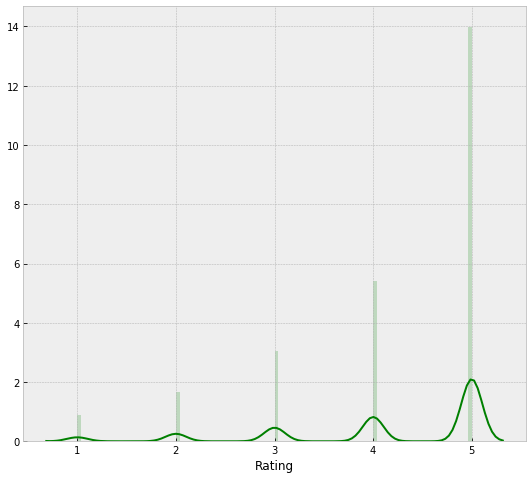

In [0]:
print(ecom_review1['Rating'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(ecom_review1['Rating'], color='g', bins=100, hist_kws={'alpha': 0.2});

In [0]:

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline

#### COLAB does not have the html backup by default. Hence run the below to enable this.

#### Please note you have to call this in each CELL where you want to plot from plotly

configure_plotly_browser_state()

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
## target count ##
configure_plotly_browser_state()## this is the function for showing the plot
cnt_srs = ecom_review1['Rating'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count',
    font=dict(size=12)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Target distribution',
    font=dict(size=12),
    width=400,
    height=400,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

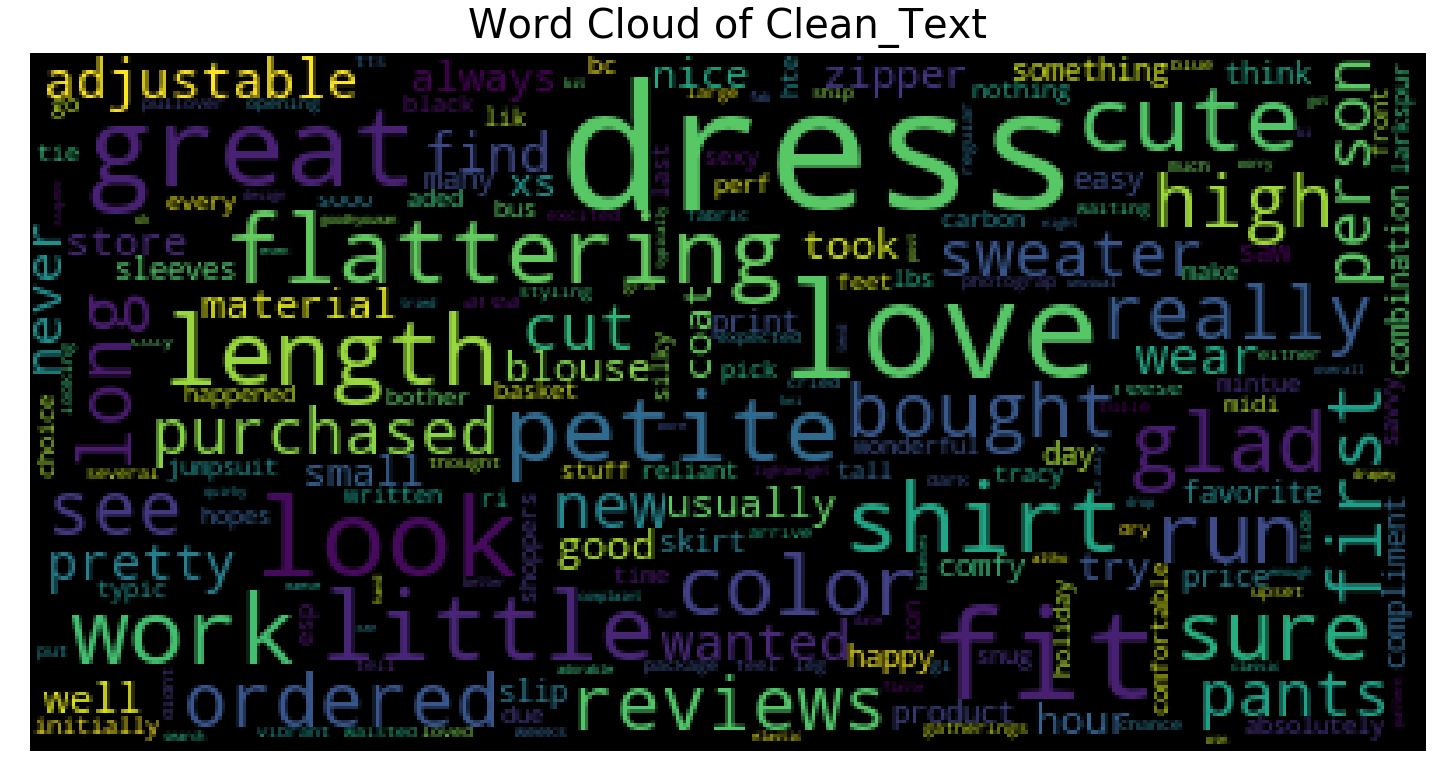

In [0]:
# https://www.kaggle.com/aashita/word-clouds-of-various-shapes ## Check this link for more


from wordcloud import WordCloud, STOPWORDS


def plot_wordcloud(text, mask=None, max_words=200, max_font_size=50, figure_size=(20.0,12.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(ecom_review1['clean_text'], title="Word Cloud of Clean_Text")

In [0]:
def generate_wordcloud(tup):
    wordcloud = WordCloud(background_color='white',
                          max_words=50, max_font_size=40,
                          random_state=42
                         ).generate(str(tup))
    return wordcloud

Text(0.5, 1.0, 'Clean_text')

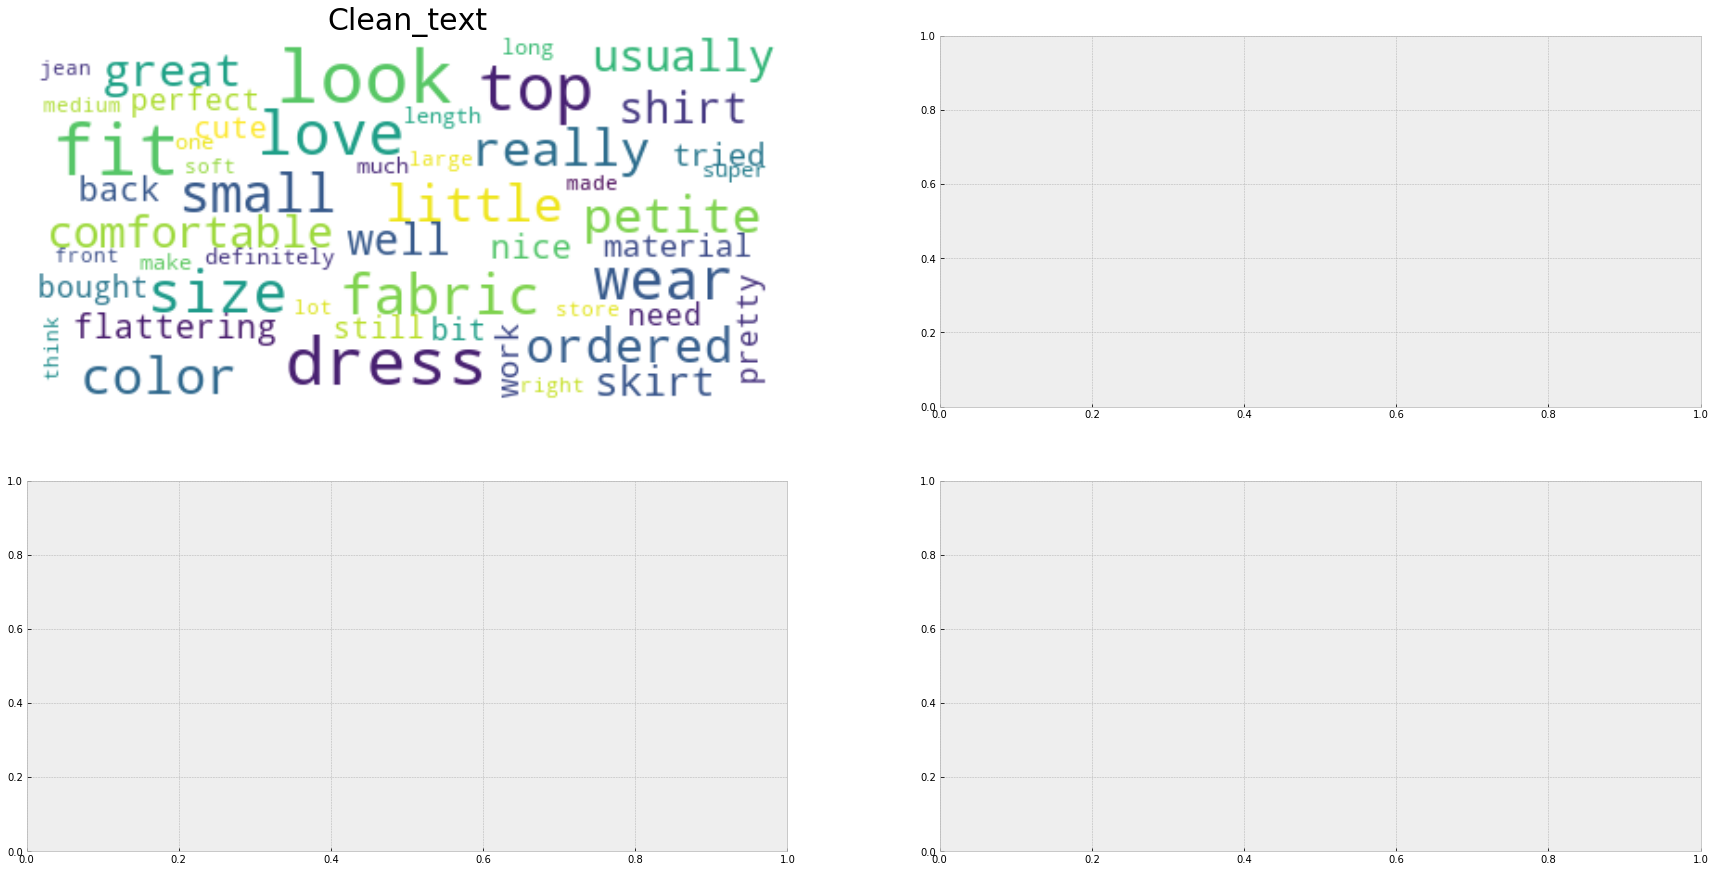

In [0]:
fig,axes = plt.subplots(2, 2, figsize=(30, 15)) ## just in case you want to compare 4 word cloud

ax = axes[0, 0]

clean100 = Counter(ecom_review1['clean_text']).most_common(100)
ax.imshow(generate_wordcloud(clean100), interpolation="bilinear")
ax.axis('off')
ax.set_title("Clean_text", fontsize=30)

In [0]:
# Word count

configure_plotly_browser_state()## this is the function for showing the plot

from collections import defaultdict
train1_df = ecom_review1[ecom_review1["Rating"]>3]
train0_df = ecom_review1[ecom_review1["Rating"]<3]

## custom function for ngram generation ##  Please not you can just change the Ngram =1 or 2 and the chart will change
def generate_ngrams(text, n_gram=2):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart for negative sentiments##
freq_dict = defaultdict(int)
for sent in train0_df["clean_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from positives ##
freq_dict = defaultdict(int)
for sent in train1_df["clean_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of negative sentiments", 
                                          "Frequent words of positive sentiment"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

#plt.figure(figsize=(10,16))
#sns.barplot(x="ngram_count", y="ngram", data=fd_sorted.loc[:50,:], color="b")
#plt.title("Frequent words for Insincere Questions", fontsize=16)
#plt.show()

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [0]:

#Rmoves aldd urls

import re
def clean_review_html(raw_data):
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\$|\?|\=|\&|\%)*\b',' ', raw_data, flags=re.MULTILINE)
    letters_only=re.sub('\s+',' ', text)
    return letters_only

#removes all paths from the titles
def clean_review_path(raw_data):
    raw_text = re.sub(r'(\w+):(\\[A-Z0-9a-z_-]*\s*[A-Za-z0-9_-]*)?(\\[A-Za-z0-9_-]*\s*[A-Za-z0-9_-]*)*\b', '', raw_data, flags=re.MULTILINE)
    removed_path = re.sub(r'(\w+):(\[A-Z0-9a-z_-]*\s*[A-Za-z0-9_-]*)?(\[A-Za-z0-9_-]*\s*[A-Za-z0-9_-]*)*\b', '', raw_text, flags=re.MULTILINE)
    return removed_path

#Remove all punctuation marks from a string including underscores.
def remove_punctuation(text):
    return re.sub(r"[\\]", ' ',(' '.join(re.sub(r"[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", ' ',text).split())))

#remove all words attached to '/' or '\'. this will remove all links that have not been removed
def remove_paths_urls(text):#'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    return ' '.join([word for word in text.split() if '\\' not in word and '/' not in word])

In [0]:
# Split Title at upper case takes IAmTHEBoy you know => I Am THE Boy you know.
def split_on_uppercase(s, keep_contiguous=True):
    """  Args:
        s (str): string
        keep_contiguous (bool): flag to indicate we want to 
                                keep contiguous uppercase chars together
    """

    string_length = len(s)
    is_lower_around = (lambda: s[i-1].islower() or string_length > (i + 1) and s[i + 1].islower())
    start = 0
    parts = []
    for i in range(1, string_length):
        if s[i].isupper() and (not keep_contiguous or is_lower_around()):
            parts.append(s[start: i])
            start = i
    parts.append(s[start:])

    return " ".join(parts)
print(split_on_uppercase('TheLongANDANdeWindingRoad', True))  

The Long ANDA Nde Winding Road


In [0]:
def deal_with_binscope(s):
    return re.sub('(BinScope)|(bin scope)', ' binscope ', s, flags = re.IGNORECASE)
deal_with_binscope('some instances of BiNscOpe are like Bin scoPe')

'some instances of  binscope  are like  binscope '

In [0]:
def deal_with_policheck(title):
    return re.sub('(poLICheck)|(poli check)', ' policheck ', title, flags=re.IGNORECASE)
deal_with_policheck('''[ DotNet-CoreFx-Trusted_master ][ PoliCheck ] - Defect POli cheCK:''')

'[ DotNet-CoreFx-Trusted_master ][  policheck  ] - Defect  policheck :'

In [0]:
data1 = ecom_review1['clean_text'].apply(deal_with_policheck)


In [0]:
data1=pd.DataFrame(data1)

In [0]:
data1.head()

NameError: ignored

In [0]:

ecom_review1['clean_text'] = ecom_review1['clean_text'].apply(deal_with_policheck)
ecom_review1['clean_text'] = ecom_review1['clean_text'].apply(deal_with_binscope)
ecom_review1['clean_text'] = ecom_review1['clean_text'].apply(clean_review_html)
ecom_review1['clean_text'] = ecom_review1['clean_text'].apply(clean_review_path)
ecom_review1['clean_text'] = ecom_review1['clean_text'].apply(remove_paths_urls)
ecom_review1['clean_text'] = ecom_review1['clean_text'].apply(split_on_uppercase)
ecom_review1['clean_text'] = ecom_review1['clean_text'].apply(remove_punctuation)


### Exploratory Cluster Analysis -- helps to generate more sense 

*   K-means clustering
*   Hirarchical clustering
*   Text clustering using different distance method
*   KP Way to cluster
*   Word2Vec based clustering

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import nltk
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import LatentDirichletAllocation


#### K-means clustering

In [0]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(ecom_review1['clean_text'])


In [0]:
vectorizer3 = TfidfVectorizer(max_features = 1000)
X3 = vectorizer3.fit_transform(ecom_review1['clean_text'])
words = vectorizer3.get_feature_names()

In [0]:


number_of_clusters = 10

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
model = KMeans(n_clusters=number_of_clusters, 
               init='k-means++', 
               max_iter=100, # Maximum number of iterations of the k-means algorithm for a single run.
               n_init=1)  # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

model.fit(X)

  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:


order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()



In [0]:


for i in range(number_of_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])



Cluster 0:
 generaly
 fuschia
 unattractively
 weirdly
 gap
 oddly
 large
 sending
 th
 party
Cluster 1:
 showy
 bare
 flirty
 think
 weigh
 hesitant
 swing
 feminine
 line
 worth
Cluster 2:
 gotten
 flowy
 definitely
 purchased
 big
 runs
 medium
 cute
 small
 fabric
Cluster 3:
 midriff
 way
 shirt
 supposed
 slits
 showing
 shorter
 stretch
 different
 lbs
Cluster 4:
 good
 tunic
 casual
 worn
 pants
 feel
 dress
 zuma
 flo
 flirty
Cluster 5:
 spring
 green
 lot
 lbs
 skirt
 summer
 wearing
 length
 bought
 flattering
Cluster 6:
 south
 perfect
 appropriate
 look
 immediately
 drapes
 wear
 winter
 liked
 nicely
Cluster 7:
 dress
 love
 size
 great
 fit
 like
 wear
 small
 fabric
 color
Cluster 8:
 torso
 sactuary
 patten
 gamble
 willing
 risk
 pulling
 feet
 jumpsuit
 small
Cluster 9:
 cute
 super
 size
 really
 love
 like
 little
 dress
 great
 wear


#### Hirarchical Clustering

In [0]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    plt.figure(figsize=(15,10))
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [0]:
# components for features reduction
n_components = 5

# covert words into TFIDF metrics
tfidf = TfidfVectorizer(stop_words = 'english')
X_text = tfidf.fit_transform(ecom_review1['clean_text'])

# reduce dimensions
svd = TruncatedSVD(n_components=n_components, random_state = 0)
X_2d = svd.fit_transform(X_text)

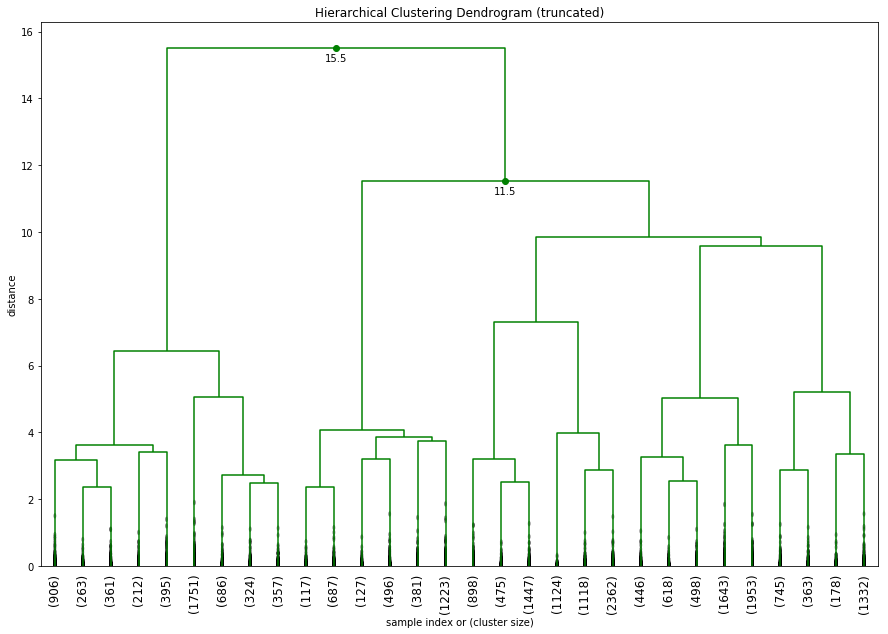

In [0]:


from scipy.cluster.hierarchy import dendrogram, ward

linked_array = ward(X_2d) # X3 is the selected 1000 top TF IDF matrix

fancy_dendrogram(
    linked_array,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=80
)

plt.show()



## Need to check how to assign these cluster and show the key words at each node

#### KP Way of clustering

In [0]:
# components for features reduction
n_components = 5

# covert words into TFIDF metrics
tfidf = TfidfVectorizer(stop_words = 'english')
X_text = tfidf.fit_transform(ecom_review1['clean_text'])

# reduce dimensions
svd = TruncatedSVD(n_components=n_components, random_state = 0)
X_2d = svd.fit_transform(X_text)



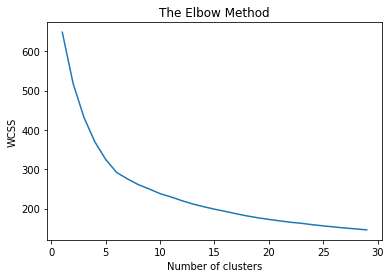

In [0]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=10,random_state=0)
    kmeans.fit(X_2d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,30),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [0]:


# number of clusters we want
n_clusters = 5

# fit k-mean clustering
kmeans = KMeans(n_clusters=n_clusters, random_state = 0)

# predict our clusters for each song
X_clustered = kmeans.fit_predict(X_2d)

# display by groups
df_plot = pd.DataFrame(list(X_2d), list(X_clustered))
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'index': 'Cluster'}, inplace = True)
df_plot['Cluster'] = df_plot['Cluster'].astype(int)

print(df_plot.head())

print(df_plot.groupby('Cluster').agg({'Cluster': 'count'}))

   Cluster         0         1         2         3         4
0        2  0.058671  0.004860  0.073564  0.028420  0.019373
1        0  0.182442 -0.020049 -0.017946  0.063114  0.128747
2        1  0.166091  0.046986 -0.123184  0.034774 -0.018025
3        4  0.194537 -0.100500  0.223363  0.134598 -0.034487
4        0  0.168314 -0.076059  0.103964 -0.025614  0.096920
         Cluster
Cluster         
0           3180
1           4457
2           9611
3           3530
4           2708


Text(0.01, 0.5, 'Component n')

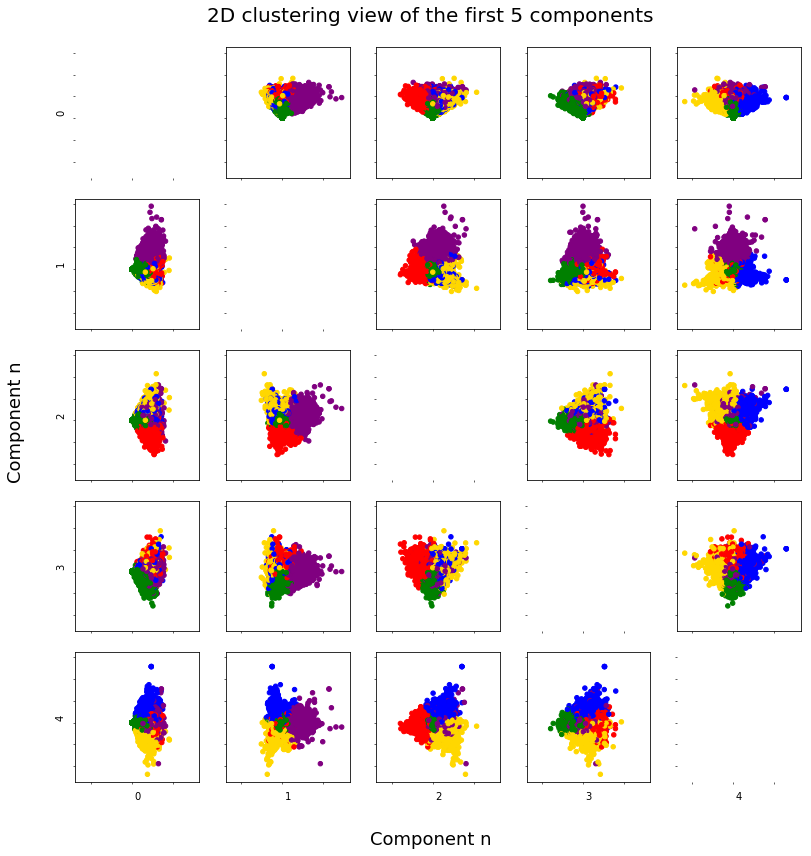

In [0]:
# make a column for color by clusters
col = df_plot['Cluster'].map({0:'b', 1:'r', 2: 'g', 3:'purple', 4:'gold'})

# variable for first n dimensions we want to plot
n = 5

# visualize the clusters by first n dimensions (reduced)
fig, ax = plt.subplots(n, n, sharex=True, sharey=True, figsize=(12,12))
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

# plot it
k = 0
for i in range(0,n):
    for j in range(0,n):
        if i != j:
            df_plot.plot(kind = 'scatter', x=j, y=i, c=col, ax = ax[i][j], fontsize = 18)
        else:
            ax[i][j].set_xlabel(i)
            ax[i][j].set_ylabel(j)
            ax[i][j].set_frame_on(False)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        
plt.suptitle('2D clustering view of the first {} components'.format(n), fontsize = 20)
fig.text(0.5, 0.01, 'Principal component-1', ha='center', fontsize = 18)
fig.text(0.01, 0.5, 'Principal component-2', va='center', rotation='vertical', fontsize = 18)

In [0]:
df_plot.head()

,Cluster,0,1,2,3,4
0,2,0.058671,0.004860,0.073564,0.028420,0.019373
1,0,0.182442,-0.020049,-0.017946,0.063114,0.128747
2,1,0.166091,0.046986,-0.123184,0.034774,-0.018025
3,4,0.194537,-0.100500,0.223363,0.134598,-0.034487
4,0,0.168314,-0.076059,0.103964,-0.025614,0.096920


In [0]:
# Assigning the cluster to the dataframe
ecom_review1['Cluster'] = df_plot['Cluster']


In [0]:
ecom_review1.head(10)

,Rating,Review_Text,Title,clean_text1,clean_text,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len,Target,Cluster
0,4,Absolutely wonderful - silky and sexy and comf...,NaN,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,7,53,2,1,0,1,5.750000,2.0,2
1,5,Love this dress! it's sooo pretty. i happene...,NaN,love sooo pretty happened find glad bc never w...,love sooo pretty happened find glad bc never w...,47,303,33,13,0,1,3.822581,2.0,0
2,3,I had such high hopes for this dress and reall...,Some major design flaws,high hopes dress really wanted work initially ...,high hopes dress really wanted work initially ...,72,500,47,14,1,1,4.112245,1.0,1
3,5,"I love, love, love this jumpsuit. it's fun, fl...",My favorite buy!,love jumpsuit every time wear get nothing great,love jumpsuit every time wear get nothing great,20,124,8,9,1,1,4.681818,2.0,4
4,5,This shirt is very flattering to all due to th...,Flattering shirt,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,28,192,20,5,0,1,4.361111,2.0,0
5,2,"I love tracy reese dresses, but this one is no...",Not for the very petite,love tracy reese one petite feet tall usually ...,love tracy reese one petite feet tall usually ...,65,488,57,9,1,1,3.989796,0.0,3
6,5,I aded this in my basket at hte last mintue to...,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,aded basket hte last mintue see would look lik...,74,496,50,22,1,1,3.920792,2.0,2
7,4,"I ordered this in carbon for store pick up, an...","Shimmer, surprisingly goes with lots",ordered carbon store pick ton stuff always try...,ordered carbon store pick ton stuff always try...,74,482,45,21,1,1,3.979381,2.0,2
8,5,I love this dress. i usually get an xs but it ...,Flattering,love dress usually get xs runs little snug bus...,love dress usually get xs runs little snug bus...,32,166,18,3,1,1,3.911765,2.0,1
9,5,"I'm 5""5' and 125 lbs. i ordered the s petite t...",Such a fun dress!,lbs ordered petite make sure length long typic...,lbs ordered petite make sure length long typic...,58,360,35,18,0,0,4.013889,2.0,1


In [0]:
# Logistic Regression approach

ecom_review1['Cluster'] = df_plot['Cluster']

# function for finding most significant words for each cluster
def generate_text(cluster):
    
    df_s = ecom_review1['clean_text']
    y = ecom_review1['Cluster'].map(lambda x: 1 if x == cluster else 0)
    count = len(df_s)
    
    tfidf = TfidfVectorizer(stop_words = 'english')
    X = tfidf.fit_transform(df_s)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf = LogisticRegression(random_state = 0).fit(X_train, y_train)
    clf_d = DummyClassifier().fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    acc_d = clf_d.score(X_test, y_test)
    coef = clf.coef_.tolist()[0]
    w = tfidf.get_feature_names()
    coeff_df = pd.DataFrame({'words' : w, 'score' : coef})
    coeff_df = coeff_df.sort_values(['score', 'words'], ascending=[0, 1])
    coeff_df = coeff_df[:30]
    d = coeff_df.set_index('words')['score'].to_dict()
    return d, acc, acc_d

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

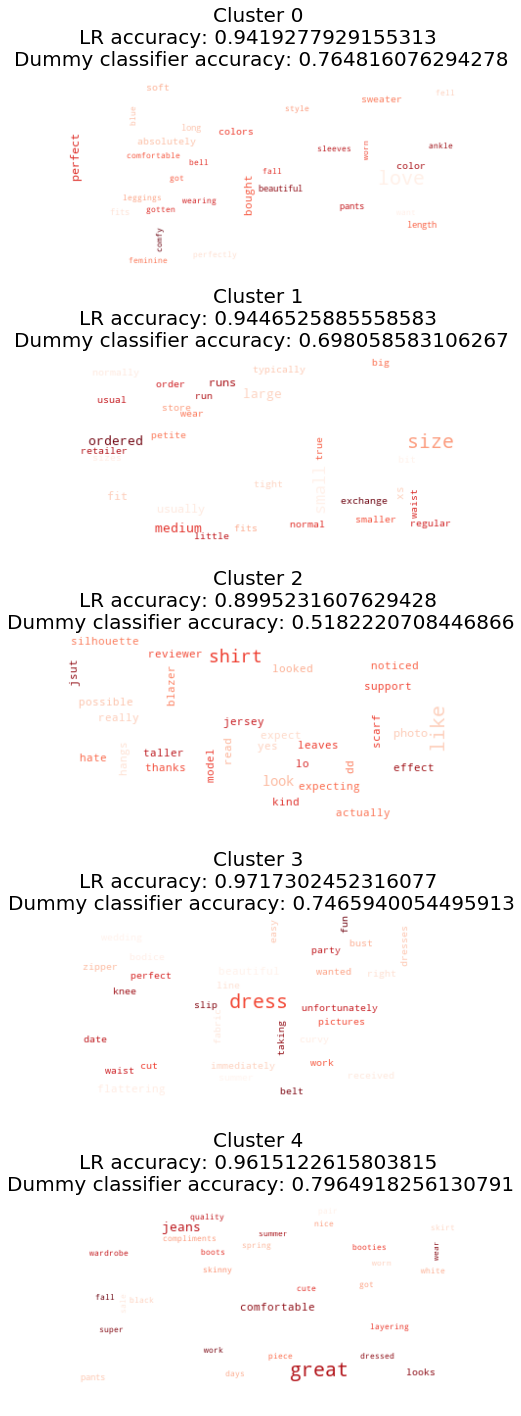

In [0]:


# visualized it by word clouds
fig, ax = plt.subplots(n_clusters, sharex=True, figsize=(7,5*n_clusters))

for i in range(0, n_clusters):
    d, acc, acc_d = generate_text(i)
    wordcloud = WordCloud(max_font_size=20, collocations=False, colormap = 'Reds', background_color = 'white').fit_words(d)
    ax[i].imshow(wordcloud, interpolation='bilinear')
    ax[i].set_title('Cluster {} \nLR accuracy: {} \nDummy classifier accuracy: {}'.format(i, acc, acc_d), fontsize = 20)
    ax[i].axis("off")





## Feature engineering and Feature generation

#### Apart from the text itself we can generate features as mentioned below from the uncleaned text

*    Number of words in the text
*    Number of unique words in the text
*    Number of characters in the text
*    Number of stopwords
*    Number of punctuations
*    Number of upper case words
*    Number of title case words
*    Average length of the words



In [0]:
import json
import string
from wordcloud import WordCloud, STOPWORDS
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [0]:

from collections import defaultdict


## Number of unique words in the text ##
ecom_review1["num_unique_words"] = ecom_review1["Review_Text"].apply(lambda x: len(set(str(x).split())))


## Number of characters in the text ##
ecom_review1["num_chars"] = ecom_review1["Review_Text"].apply(lambda x: len(str(x)))


## Number of stopwords in the text ##
ecom_review1["num_stopwords"] = ecom_review1["Review_Text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))


## Number of punctuations in the text ##
ecom_review1["num_punctuations"] =ecom_review1['Review_Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )


## Number of title case words in the text ##
ecom_review1["num_words_upper"] = ecom_review1["Review_Text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))


## Number of title case words in the text ##
ecom_review1["num_words_title"] = ecom_review1["Review_Text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))


## Average length of the words in the text ##
ecom_review1["mean_word_len"] = ecom_review1["Review_Text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))



In [0]:
ecom_review1.head()

,Rating,Review_Text,Title,clean_text1,clean_text,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,4,Absolutely wonderful - silky and sexy and comf...,NaN,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,7,53,2,1,0,1,5.750000
1,5,Love this dress! it's sooo pretty. i happene...,NaN,love sooo pretty happened find glad bc never w...,love sooo pretty happened find glad bc never w...,47,303,33,13,0,1,3.822581
2,3,I had such high hopes for this dress and reall...,Some major design flaws,high hopes dress really wanted work initially ...,high hopes dress really wanted work initially ...,72,500,47,14,1,1,4.112245
3,5,"I love, love, love this jumpsuit. it's fun, fl...",My favorite buy!,love jumpsuit every time wear get nothing great,love jumpsuit every time wear get nothing great,20,124,8,9,1,1,4.681818
4,5,This shirt is very flattering to all due to th...,Flattering shirt,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,28,192,20,5,0,1,4.361111


In [0]:
  
ecom_review1.loc[ecom_review1.Rating < 3, 'Target'] = 0 
ecom_review1.loc[ecom_review1.Rating > 3, 'Target'] = 2
ecom_review1.loc[ecom_review1.Rating == 3, 'Target'] = 1 


In [0]:
ecom_review1.head()

,Rating,Review_Text,Title,clean_text1,clean_text,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len,Target
0,4,Absolutely wonderful - silky and sexy and comf...,NaN,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,7,53,2,1,0,1,5.750000,2.0
1,5,Love this dress! it's sooo pretty. i happene...,NaN,love sooo pretty happened find glad bc never w...,love sooo pretty happened find glad bc never w...,47,303,33,13,0,1,3.822581,2.0
2,3,I had such high hopes for this dress and reall...,Some major design flaws,high hopes dress really wanted work initially ...,high hopes dress really wanted work initially ...,72,500,47,14,1,1,4.112245,1.0
3,5,"I love, love, love this jumpsuit. it's fun, fl...",My favorite buy!,love jumpsuit every time wear get nothing great,love jumpsuit every time wear get nothing great,20,124,8,9,1,1,4.681818,2.0
4,5,This shirt is very flattering to all due to th...,Flattering shirt,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,28,192,20,5,0,1,4.361111,2.0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



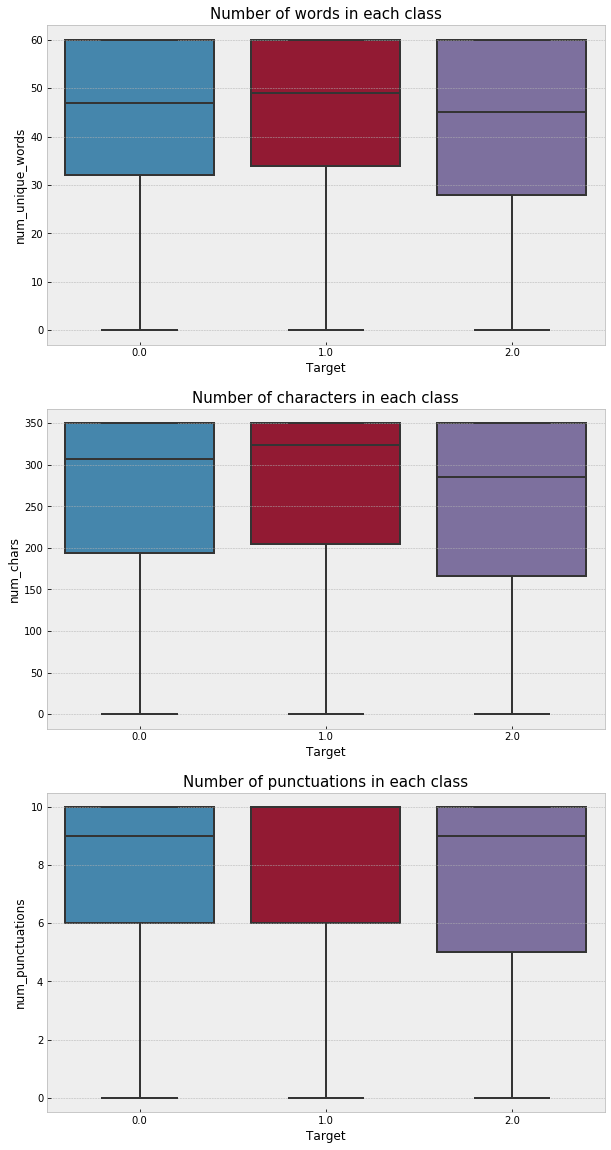

In [0]:
## Truncate some extreme values for better visuals ##
ecom_review1['num_unique_words'].loc[ecom_review1['num_unique_words']>60] = 60 #truncation for better visuals
ecom_review1['num_punctuations'].loc[ecom_review1['num_punctuations']>10] = 10 #truncation for better visuals
ecom_review1['num_chars'].loc[ecom_review1['num_chars']>350] = 350 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.boxplot(x='Target', y='num_unique_words', data=ecom_review1, ax=axes[0])
axes[0].set_xlabel('Target', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.boxplot(x='Target', y='num_chars', data=ecom_review1, ax=axes[1])
axes[1].set_xlabel('Target', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.boxplot(x='Target', y='num_punctuations', data=ecom_review1, ax=axes[2])
axes[2].set_xlabel('Target', fontsize=12)
#plt.ylabel('Number of punctuations in text', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

In [0]:
# Let's uderstand the differnce between DTM and TF-IDF

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

In [0]:

print(vectorizer.vocabulary_)

In [0]:

from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
		"The dog.",
		"The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

### Basic Supervised model on both DTM and TF-IDF

*    NB
*    Logistic regression (both using statmodels and sikit-learn)
*    KNN
*    Tree Models
*    Baysian models
*    Feature selection using different methods(chi-Square etc) & model iteration

In [0]:
# Let's see what data we have?

ecom_review1.head()

,Rating,Review_Text,Title,clean_text1,clean_text,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len,Target,Cluster
0,4,Absolutely wonderful - silky and sexy and comf...,NaN,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,7,53,2,1,0,1,5.750000,2.0,2
1,5,Love this dress! it's sooo pretty. i happene...,NaN,love sooo pretty happened find glad bc never w...,love sooo pretty happened find glad bc never w...,47,303,33,13,0,1,3.822581,2.0,0
2,3,I had such high hopes for this dress and reall...,Some major design flaws,high hopes dress really wanted work initially ...,high hopes dress really wanted work initially ...,72,500,47,14,1,1,4.112245,1.0,1
3,5,"I love, love, love this jumpsuit. it's fun, fl...",My favorite buy!,love jumpsuit every time wear get nothing great,love jumpsuit every time wear get nothing great,20,124,8,9,1,1,4.681818,2.0,4
4,5,This shirt is very flattering to all due to th...,Flattering shirt,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,28,192,20,5,0,1,4.361111,2.0,0


In [0]:
ecom_senti_ABT =ecom_review1[["Target","clean_text"]]

In [0]:
ecom_senti_ABT.head(2)

,Target,clean_text
0,2.0,absolutely wonderful silky sexy comfortable
1,2.0,love sooo pretty happened find glad bc never w...


In [0]:
# how to define X and y 
X = ecom_senti_ABT.clean_text
y = ecom_senti_ABT.Target
print(X.shape)
print(y.shape)

(23486,)
(23486,)


In [0]:
# split X and y into training and testing sets
# by default, it splits 75% training and 25% test
# random_state=1 for reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17614,)
(5872,)
(17614,)
(5872,)


In [0]:
# 2. instantiate the vectorizer
vect = CountVectorizer()

In [0]:
# learn training data vocabulary, then use it to create a document-term matrix

# 3. fit
vect.fit(X_train)

# 4. transform training data
X_train_dtm = vect.transform(X_train)

In [0]:
# equivalently: combine fit and transform into a single step
# this is faster and what most people would do
X_train_dtm = vect.fit_transform(X_train)

#### Ensuring both DTM has same vocabulary-- else model wil fail

In [0]:
# examine the document-term matrix
X_train_dtm

<17614x11367 sparse matrix of type '<class 'numpy.int64'>'
	with 403448 stored elements in Compressed Sparse Row format>

In [0]:
# 4. transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

# you can see that the number of columns, 11367, is the same as what we have learned above in X_train_dtm

<5872x11367 sparse matrix of type '<class 'numpy.int64'>'
	with 133045 stored elements in Compressed Sparse Row format>

#### Naive Bays Model

In [0]:
# 1. import
from sklearn.naive_bayes import MultinomialNB

# 2. instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

In [0]:
# 3. train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time nb.fit(X_train_dtm, y_train)

CPU times: user 12.3 ms, sys: 921 µs, total: 13.2 ms
Wall time: 13.5 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# 4. make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [0]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8140326975476839

In [0]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 224,  180,  208],
       [  93,  228,  422],
       [  31,  158, 4328]])

In [0]:
# print message text for the false positives 

X_test[y_pred_class > y_test]

# alternative less elegant but easier to understand
# X_test[(y_pred_class==1) & (y_test==0)]

#### As you can see multinomial model is not working well---- we shall try with binary one vs other models

In [0]:
  
ecom_review1.loc[ecom_review1.Rating < 3, 'Target_negative'] = 1 
ecom_review1.loc[ecom_review1.Rating >= 3, 'Target_negative'] = 0  
ecom_review1.loc[ecom_review1.Rating > 3, 'Target_positive'] = 1
ecom_review1.loc[ecom_review1.Rating <= 3, 'Target_positive'] = 0

ecom_review1.loc[ecom_review1.Rating == 3, 'Target_Neutral'] = 1
ecom_review1.loc[ecom_review1.Rating != 3, 'Target_Neutral'] = 0

In [0]:
ecom_Neg_senti_ABT =ecom_review1[["Target_negative","clean_text"]]

In [0]:
# how to define X and y 
X = ecom_Neg_senti_ABT.clean_text
y = ecom_Neg_senti_ABT.Target_negative
print(X.shape)
print(y.shape)

(23486,)
(23486,)


In [0]:
# split X and y into training and testing sets
# by default, it splits 75% training and 25% test
# random_state=1 for reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17614,)
(5872,)
(17614,)
(5872,)


In [0]:
# 2. instantiate the vectorizer
vect = CountVectorizer()
# learn training data vocabulary, then use it to create a document-term matrix


# equivalently: combine fit and transform into a single step
# this is faster and what most people would do
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [0]:
# 1. import
from sklearn.naive_bayes import MultinomialNB

# 2. instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

In [0]:
# 3. train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time nb.fit(X_train_dtm, y_train)

CPU times: user 10.1 ms, sys: 113 µs, total: 10.2 ms
Wall time: 10.2 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# 4. make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [0]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9087193460490464

In [0]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)

# Numpy Array with 2C
# left Column: probability class 0
# right C: probability class 1
# we only need the right column 
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]
y_pred_prob

# Naive Bayes predicts very extreme probabilites, you should not take them at face value

array([5.98043587e-03, 5.65798068e-07, 1.37476935e-10, ...,
       3.31286430e-02, 5.25966162e-07, 1.40693622e-03])

In [0]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.8944413380054176

In [0]:
# 1. import
from sklearn.linear_model import LogisticRegression

# 2. instantiate a logistic regression model
logreg = LogisticRegression()

In [0]:
# 3. train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 566 ms, sys: 372 ms, total: 938 ms
Wall time: 492 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# 4. make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [0]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([4.34900310e-02, 1.17428758e-02, 3.11837343e-05, ...,
       6.94141881e-02, 7.22087849e-04, 1.48879926e-02])

In [0]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.886283829121002

### Unsupervised models for sentiment

*   Bag-Of-Words
*   Valence
*   Text Blob
*   others

### Unsupervised Topic modelling

*  Cluster Analysis
*  LSA (latent semantic analysis)
*  NMF (non negative matrix factorization)
*  ETC

### POS tagging and model iteration

### Entity and Intent recognition from text

*   Name entity recognition (NER)